In [1]:
import tensorflow.compat.v1 as tf
train,test = tf.keras.datasets.mnist.load_data()

In [2]:
train_x = train[0]
train_y = train[1]
test_x = test[0]
test_y = test[1]
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
[7 2 1 ... 4 5 6]


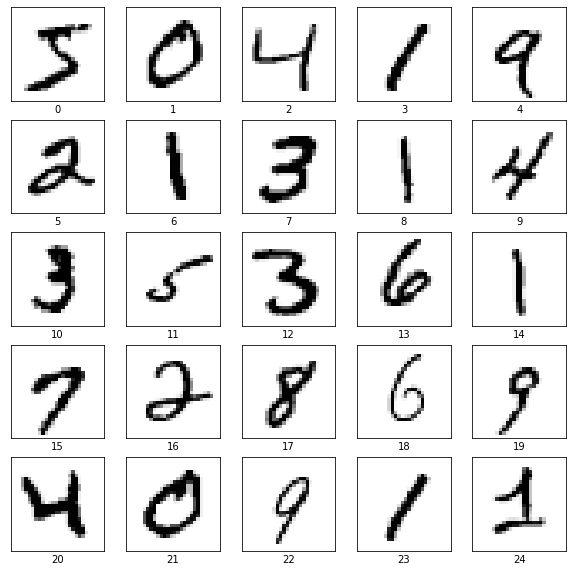

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_x[i],cmap='Greys')
  plt.xlabel(i)
plt.show()

In [4]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [5]:
import tensorflow as tf
from tensorflow.keras import Model, layers, models
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import numpy as np

In [6]:
def my_cnn2d_model(inp_shape, noc = 10):
  model = Sequential()
  model.add(Conv2D(16, 3, strides=1, input_shape=inp_shape, padding='same'))
  model.add(MaxPool2D(pool_size=2))
  model.add(Dropout(0.4))
  model.add(BatchNormalization())
  model.add(Conv2D(32, 3, strides=(1,1),padding='same'))
  model.add(MaxPool2D(pool_size=2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, 3, strides=(1,1),padding='same'))
  model.add(MaxPool2D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(units=noc, activation='softmax'))
  return model

In [7]:
x = np.expand_dims(train_x, axis=3)
x_test = np.expand_dims(test_x, axis=3)
print(x.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
my_model = my_cnn2d_model(x[0].shape)
base_learning_rate = 0.0001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                      loss=tf.keras.losses.categorical_crossentropy,
                      metrics=['accuracy'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0

In [9]:
best_acc=0
epochs =10
for e in range(epochs):
  history = my_model.fit(x, train_y, batch_size = 64, validation_data=(x_test,test_y), verbose=True, epochs=1)
  val_acc = history.history['val_accuracy'][0]
  if best_acc < val_acc:
    best_acc = val_acc
    my_model.save('bestWeight.h5') # my_model.save_weights('')
    print('Best model weights saved')

938/938 [==============================] - 54s 57ms/step - loss: 1.7356 - accuracy: 0.4180 - val_loss: 0.2834 - val_accuracy: 0.9226
Best model weights saved
938/938 [==============================] - 53s 57ms/step - loss: 0.3863 - accuracy: 0.8770 - val_loss: 0.1620 - val_accuracy: 0.9493
Best model weights saved
 60/938 [>.............................] - ETA: 47s - loss: 0.2857 - accuracy: 0.9036

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

my_model = tf.keras.models.load_model('bestWeight.h5')
pred_y= my_model.predict(x_test)

pred_y=np.array([np.argmax(x) for x in pred_y])
test_y=np.array([np.argmax(x) for x in test_y])
print(pred_y[0:5])
print(test_y[0:5])
cm = confusion_matrix(test_y, pred_y)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10, 10))
sn.heatmap(cm, annot = True, annot_kws = {'size' : 20}, fmt = 'd') # font size
plt.savefig('CM_Baseline.png')

(3, 28, 28, 1)
(1, 14, 14, 16)


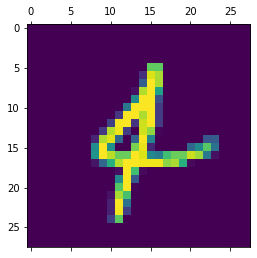

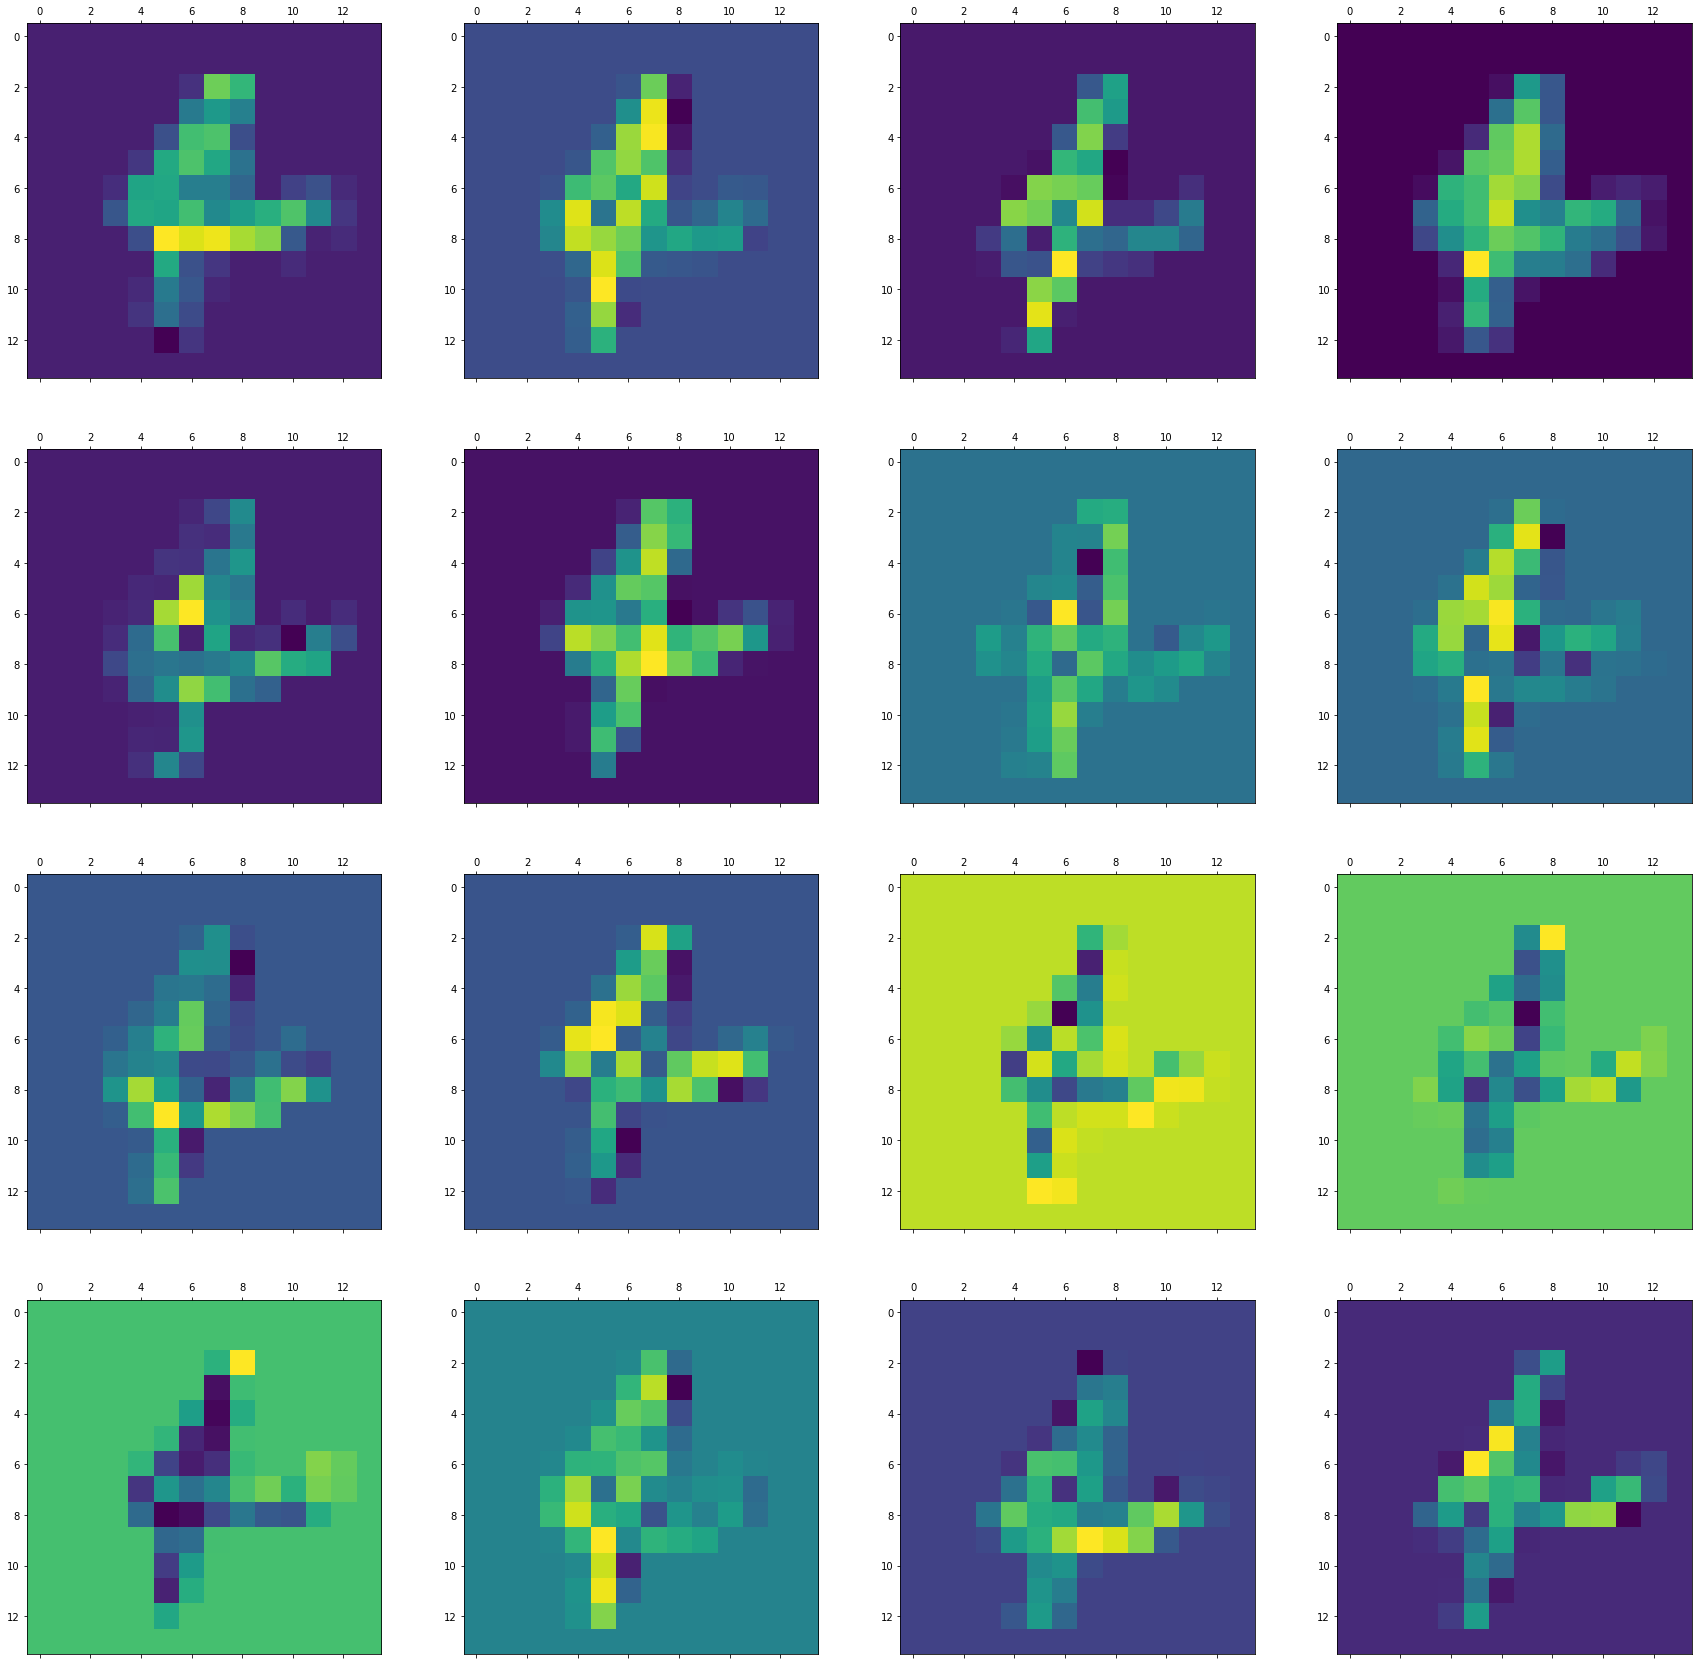

In [9]:
# Outputs of the 8 layers, which include conv2D and max pooling layers 
# layer_outputs = [layer.output for layer in model.layers[11]] 
#my_model = tf.keras.models.load_model('bestWeight.h5')
layer_outputs = my_model.layers[2].output
activation_model = models.Model(inputs = my_model.input, outputs = layer_outputs) 
print(x_test[0:3].shape)
activations = activation_model.predict(np.expand_dims(x_test[300],axis =0)) 
plt.matshow(x_test[300].squeeze(axis = 2))
# Getting Activations of first layer 
first_layer_activation = activations 

# shape of first layer activation 
print(first_layer_activation.shape) 

# 6th channel of the image after first layer of convolution is applied
f, axarr = plt.subplots(4,4, figsize=(30, 30))
k = 0
for i in range(4): 
    for j in range(4):
      axarr[i][j].matshow(first_layer_activation[0, :, :, k], cmap ='viridis')
      k+= 1 

# 15th channel of the image after first layer of convolution is applied 
# plt.matshow(first_layer_activation[0, :, :, 31], cmap ='viridis') 